Notebook used for debugging and improving FrequecnyFits.

NOTE: To work with EOB or NR data, you need to get the data we are working with from `home/md.shaikh/ecc_waveforms` on CIT.


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

import sys
sys.path.append("../")

import tqdm
import re
import warnings

import gw_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform

#gw_eccentricity.plot_settings.use_fancy_plotsettings()

%load_ext autoreload
%autoreload 2

/Users/pfeiffer/.virtualenvs/venv38/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/pfeiffer/.virtualenvs/venv38/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### debug issue #50

In [45]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.4278619249_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform(origin="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": True})
print(ecc_vec)

t_analyse[0]=-112565.75822743756, t_analyse[-1]=-0.7582274375670603, global fit to t<=-96780.75822743756
global fit: guess p0=[0.016475717842963068, 1.0977321473011741e-07, 0.0],  t_center=-56283.25822743756
            bounds=[[0.0, 0.0, -0.6065819500536483], [0.16475717842963067, 2.927285726136464e-06, 56283.25822743756]]
            result p_global=[1.35409576e-02 2.06533314e-07 2.47486967e+00]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=3619, K_initial=1.100, p_initial=162(+2.47-t)^-0.858, refine_extrema=False
it=1:  [0 / 3619 / 10828],  K=1.100
       find_peaks: distance=1190, prominence=0.0003931390551118628
       idx_extrema=   [ 1812  3612  5394  7157  8903 10632], Nleft=2, Nright=4
       t[idx_extrema]=[-110753.76 -108953.76 -107171.76 -105408.76 -103662.76 -101933.76]
       idx_ref increased to 6275
       idx_hi increased to 12160
it=2:  [0 / 6275 / 12160],  K=1.101
       idx_extrema=   [ 1812  3612  5394  7157

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:714: UserWarning: Ecc(t) is non monotonic.
  


### Debug issue #49

In [46]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1052704229_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform(origin="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": True})
print(ecc_vec)

t_analyse[0]=-27709.93849310805, t_analyse[-1]=-0.938493108047766, global fit to t<=-20386.93849310805
global fit: guess p0=[0.01833892948987729, 4.963465113085219e-07, 0.0],  t_center=-13855.43849310805
            bounds=[[0.0, 0.0, -0.7507944864382128], [0.18338929489877287, 1.3235906968227248e-05, 13855.43849310805]]
            result p_global=[2.01794157e-02 3.79451577e-07 1.38554338e+04]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=1690, K_initial=1.100, p_initial=4.17(+13855.43-t)^-0.521, refine_extrema=False
it=1:  [0 / 1690 / 5083],  K=1.100
       find_peaks: distance=558, prominence=0.0001576097992155903
       idx_extrema=   [ 874 1744 2604 3454 4295], Nleft=1, Nright=4
       t[idx_extrema]=[-26835.94 -25965.94 -25105.94 -24255.94 -23414.94]
       idx_ref increased to 2174
       idx_hi increased to 5573
it=2:  [0 / 2174 / 5573],  K=1.150
       idx_extrema=   [ 874 1744 2604 3454 4295 5125], Nleft=2, Nright=4
  

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:729: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  "Number of pericenters and number of apocenters differ by "
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:714: UserWarning: Ecc(t) is non monotonic.
  


### Debug Issue 49 (part b)

In [47]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0018322339_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform("EOB", **kwargs)

if True:
    tref_in = dataDict["t"]
    method = "FrequencyFits"
    tref, ecc, meanAno, eccMethod = \
        measure_eccentricity(tref_in=tref_in,
                         dataDict=dataDict,
                         method=method,
                         return_gwecc_object=True,
                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                         "debug": True
                         })
    print(ecc_vec)

t_analyse[0]=-34467.96956839502, t_analyse[-1]=-0.9695683950189306, global fit to t<=-28376.96956839502
global fit: guess p0=[0.02067414137291712, 4.4984285614807634e-07, 0.0],  t_center=-17234.46956839502
            bounds=[[0.0, 0.0, -0.7756547160151445], [0.2067414137291712, 1.1995809497282036e-05, 17234.46956839502]]
            result p_global=[2.53385962e-02 4.69289254e-07 6.59112454e+03]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=1378, K_initial=1.100, p_initial=2.16(+6591.12-t)^-0.441, refine_extrema=False
it=1:  [0 / 1378 / 4202],  K=1.100
       find_peaks: distance=461, prominence=3.389264754487149e-06
       idx_extrema=   [ 720 1442 2158 2869 3575], Nleft=1, Nright=4
       t[idx_extrema]=[-33747.97 -33025.97 -32309.97 -31598.97 -30892.97]
       idx_ref increased to 1800
       idx_hi increased to 4619
it=2:  [0 / 1800 / 4619],  K=1.159
       idx_extrema=   [ 720 1442 2158 2869 3575 4276], Nleft=2, Nright=4
  

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:773: UserWarning: There is at least one instance where pericenters and apocenters do not appear alternately.
  "There is at least one instance where "
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:693: UserWarning: At least a pair of pericenters are too far. Maximum orbital phase diff is 16.61820370474146. Times of occurrences are [-482.9695684]
  " Maximum orbital phase diff is "
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:510: UserWarning: Encountered negative eccentricity.
  
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:714: UserWarning: Ecc(t) is non monotonic.
  


### Debug issue #49 (part c)

In [48]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0003719374_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": True})

t_analyse[0]=-34140.29512190513, t_analyse[-1]=-1.2951219051344915, global fit to t<=-28072.295121905136
global fit: guess p0=[0.020745855373844713, 4.5573130657569155e-07, 0.0],  t_center=-17070.795121905132
            bounds=[[0.0, 0.0, -1.0360975241075934], [0.20745855373844713, 1.215283484201844e-05, 17070.795121905132]]
            result p_global=[2.55982125e-02 5.11766668e-07 2.96850714e+03]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=1372, K_initial=1.100, p_initial=1.35(+2968.51-t)^-0.401, refine_extrema=False
it=1:  [0 / 1372 / 4186],  K=1.100
       find_peaks: distance=460, prominence=7.213993771996302e-07
       idx_extrema=   [ 537 1258 1973 2683 3389 4089], Nleft=2, Nright=4
       t[idx_extrema]=[-33603.3 -32882.3 -32167.3 -31457.3 -30751.3 -30051.3]
       idx_ref increased to 2328
       idx_hi increased to 4603
it=2:  [0 / 2328 / 4603],  K=1.160
       idx_extrema=   [ 537 1258 1973 2683 3389 4089], Nleft=3

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:693: UserWarning: At least a pair of pericenters are too far. Maximum orbital phase diff is 48.88717101419968. Times of occurrences are [-462.29512191]
  " Maximum orbital phase diff is "
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:693: UserWarning: At least a pair of apocenters are too far. Maximum orbital phase diff is 39.15430139751243. Times of occurrences are [-825.29512191]
  " Maximum orbital phase diff is "
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:510: UserWarning: Encountered negative eccentricity.
  
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:714: UserWarning: Ecc(t) is non monotonic.
  


Debug issue #66

In [2]:
waveform_keywords = {"filepath": '../data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q6_e095_D65_Res3.h5',
                    "include_zero_ecc": False}
dataDict = load_waveform(origin="LVCNR", **waveform_keywords)
method = "FrequencyFits"
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                return_gwecc_object=True,
                                                                extra_kwargs={"debug": True, 
                                                                'treat_mid_points_between_pericenters_as_apocenters': False})
fig, ax = eccMethod.make_diagnostic_plots()

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:158: UserWarning: kw params_dict is not a recognized key word in dataDict.
  warnings.warn(


t_analyse[0]=-10370.405852075488, t_analyse[-1]=-0.10585207548596767, global fit to t<=-3287.0058520754874
global fit: guess p0=[0.04641999707491048, 3.357114749916107e-06, 0.0],  t_center=-5185.255852075487
            bounds=[[0.0, 0.0, -0.08468166038877414], [0.4641999707491048, 8.952305999776285e-05, 5185.255852075487]]
            result p_global=[2.05621039e-02 2.58034724e-06 5.18525585e+03]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=23168, K_initial=1.100, p_initial=3.46e+03(+5185.26-t)^-1.301, refine_extrema=False
it=1:  [0 / 23168 / 52910],  K=1.100
       find_peaks: distance=5818, prominence=0.0022277019153310296
       idx_extrema=   [12320 23588 33722 42861 51126], Nleft=1, Nright=4
       t[idx_extrema]=[-9138.41 -8011.61 -6998.21 -6084.31 -5257.81]
       idx_ref increased to 28655
       idx_hi increased to 58522
it=2:  [0 / 28655 / 58522],  K=1.300
       idx_extrema=   [12320 23588 33722 42861 51126], Nleft=

Exception: omega22 averaged [apocenter to apocenter] and [pericenter to pericenter] are non-monotonic.
First non-monotonicity occurs at peak number 2, where omega22 drops from 0.016308113535958863 to 0.016064402354499376, a decrease by -0.00024371118145948695.
Total number of places of non-monotonicity is 1.
Last one occurs at peak number 2.
Possible fixes: 
   - Increase sampling rate of data
   - Add to extra_kwargs the option 'treat_mid_points_between_pericenters_as_apocenters': True

### Debug issue #69

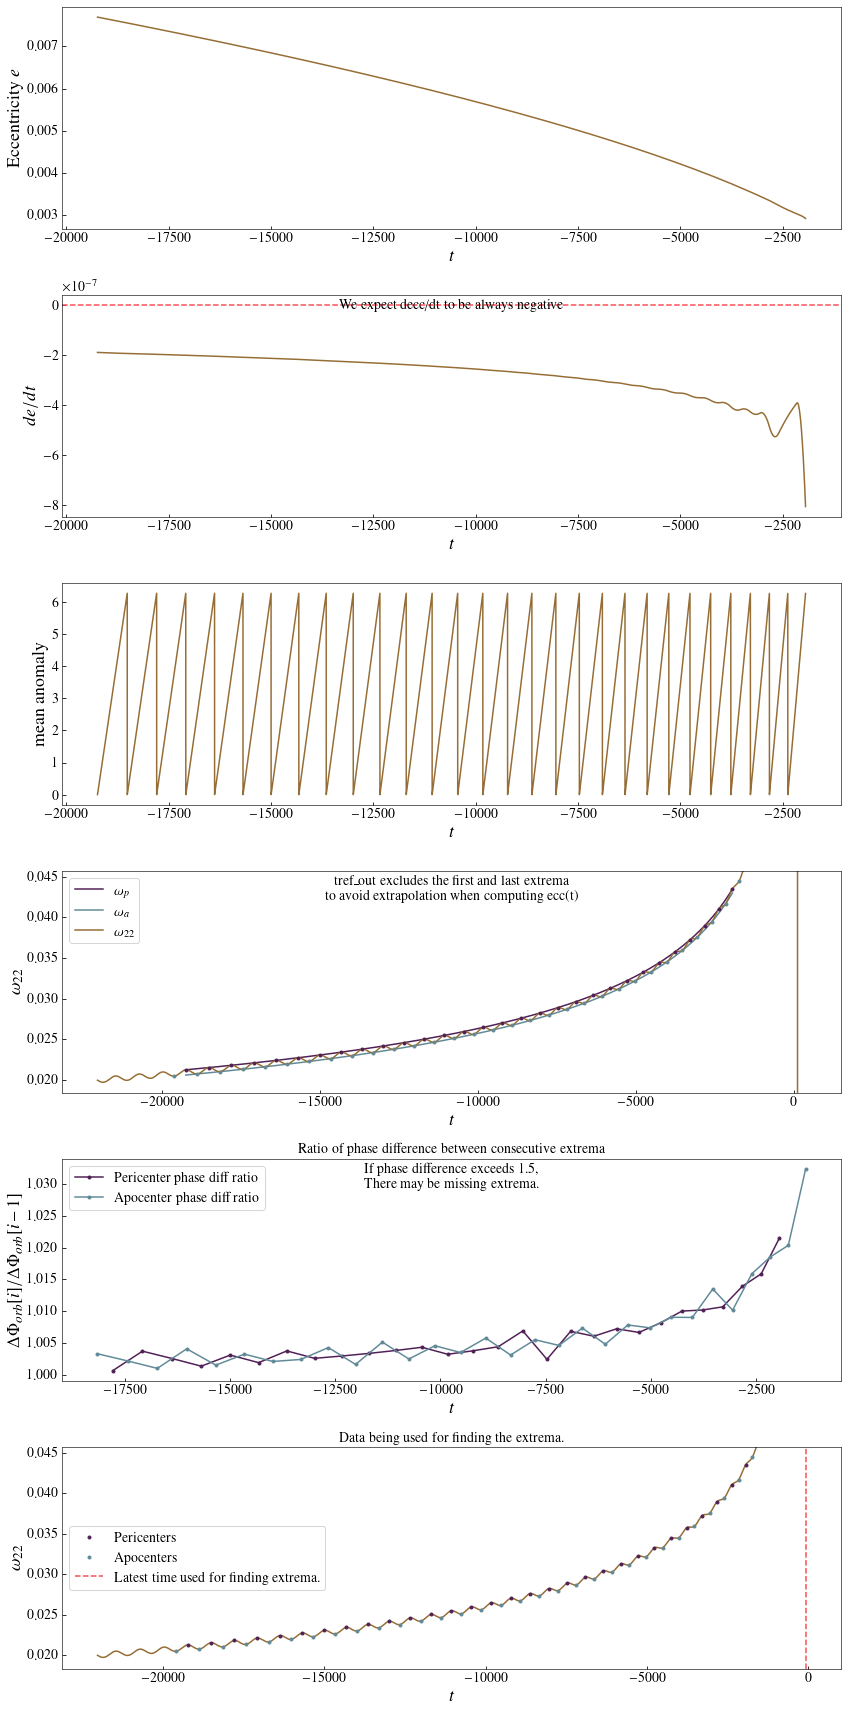

In [53]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0106376485_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
tref, measured_ecc, mean_ano, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                              method="FrequencyFits",
                                                              dataDict=dataDict,
                                                              return_gwecc_object=True,
                                                              extra_kwargs={"debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

### Debug issue 70

suggestion.   Loop and then fix the failed ones.   I'll put the failures above the loop, to make it easier to keep on running the loop

/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 3. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:540: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


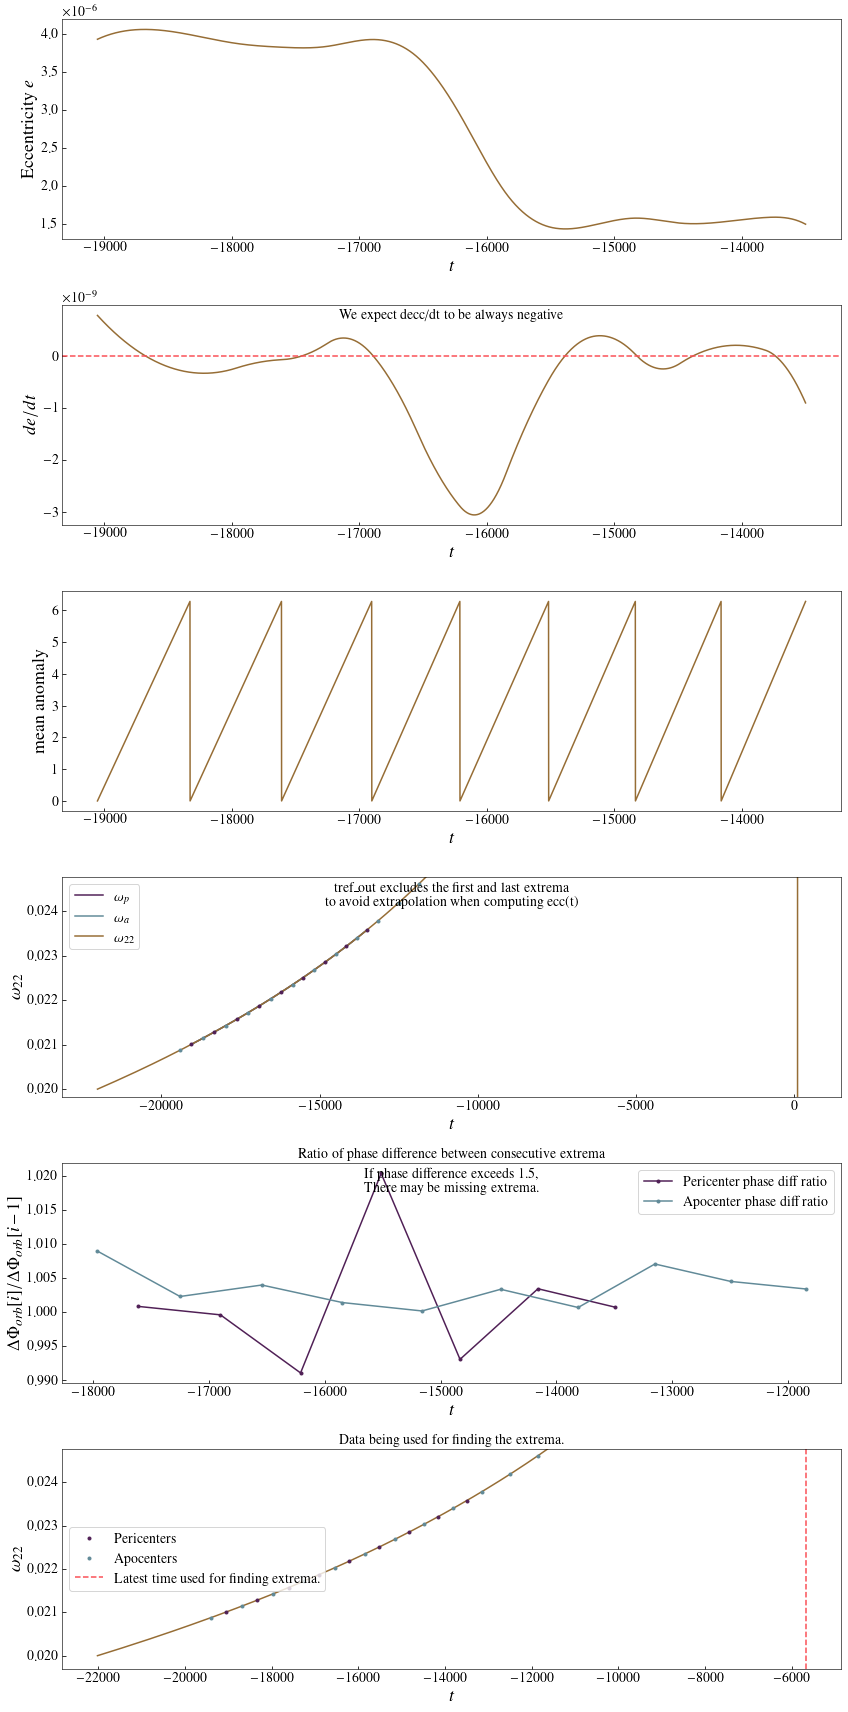

In [54]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000001000_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={
                                                            "num_orbits_to_exclude_before_merger": 20,                                                            # 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

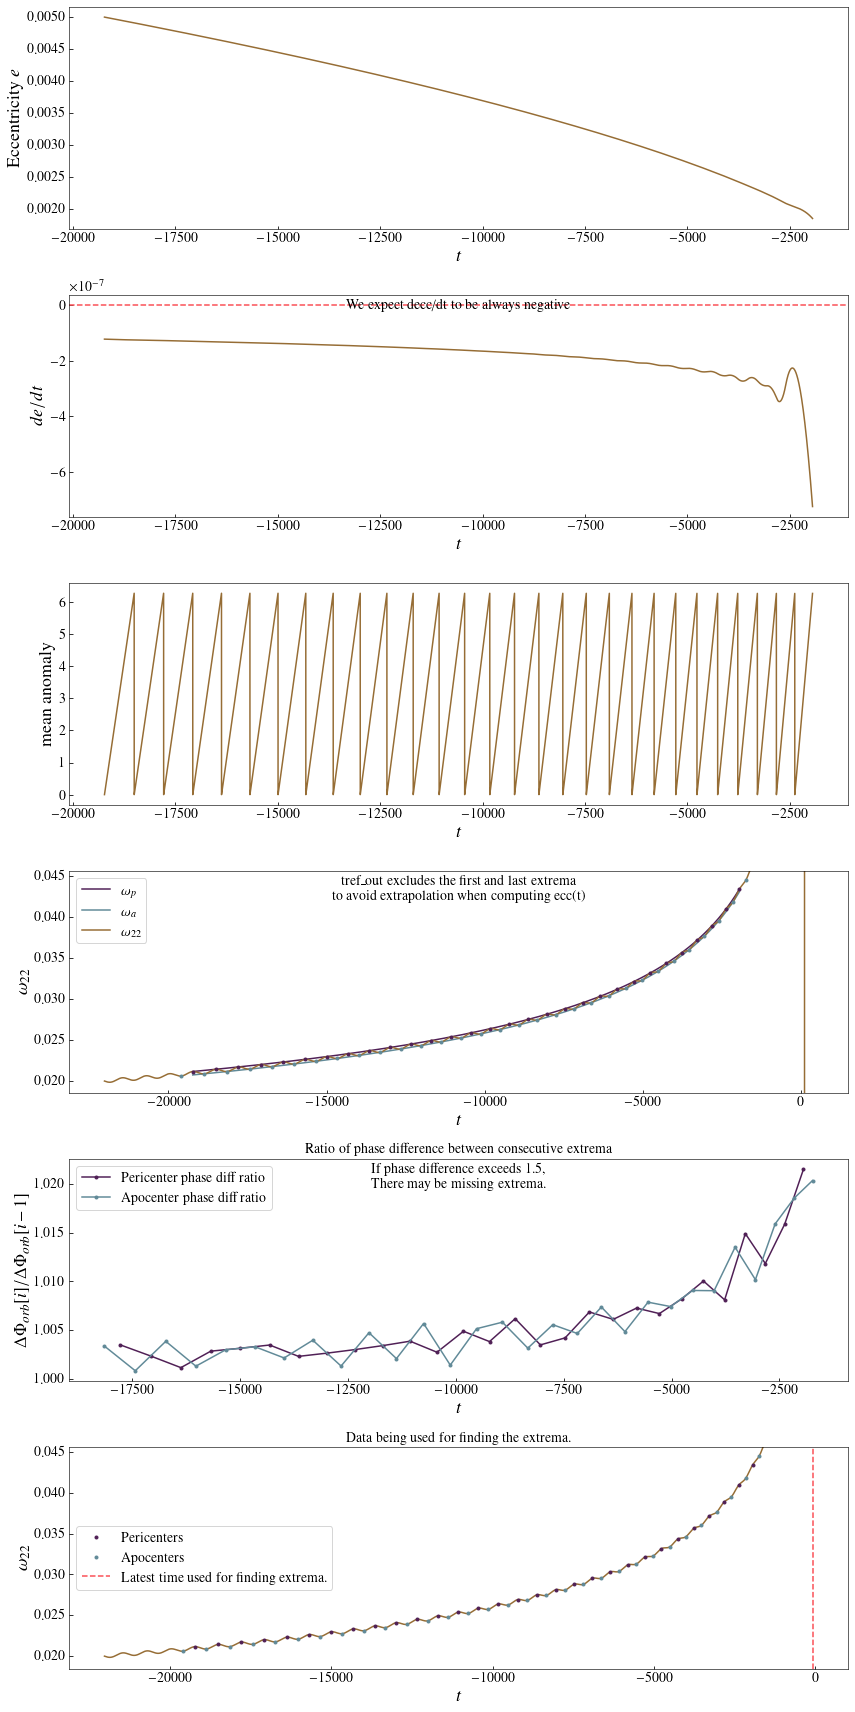

In [88]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0069012248_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={
                                                          #  "num_orbits_to_exclude_before_merger": 20,                                                            # 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

In [71]:
eob_files = sorted(glob.glob("../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00*_meanAno1.571.h5"))
waveform_eccs = []
model_eccs = [] 
failed_eccs = []
method = "FrequencyFits"

for fileName in tqdm.tqdm(eob_files[1:]):
    kwargs = {"filepath": fileName}
    dataDict = load_waveform(catalog="EOB", **kwargs)
    tref_in = dataDict["t"]
    ecc = re.findall(r"\d.\d{10}", fileName)[0]
    try:
        tref_out, measured_ecc, mean_ano = measure_eccentricity(
            tref_in=tref_in,
            dataDict=dataDict,
            method=method,
            extra_kwargs={"debug": False})
            # Get the measured eccentricity at the first available index.
            # This corresponds to the first extrema that occurs after the
            # initial time.
        waveform_eccs.append(measured_ecc[0])
        model_eccs.append(ecc)
    except Exception:
        failed_eccs.append(ecc)
        warnings.warn(f"Failed for {ecc}, file name = {fileName}.")
        print("--------------------------------------------------------------")

  0%|          | 0/150 [00:00<?, ?it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 3. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:540: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
 15%|█▌        | 23/150 [00:10<01:00,  2.09it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
 29%|██▉       | 44/150 [00:21<00:52,  2.04it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWar

### Issue 73

In [96]:
# Load test waveform
lal_kwargs = {"approximant": "EccentricTD",
              "q": 1.0,
              "chi1": [0.0, 0.0, 0.0],
              "chi2": [0.0, 0.0, 0.0],
              "Momega0": 0.01,
              "ecc": 0.1,
              "mean_ano": 0,
              "physicalUnits": True}
# load_waveform returns dataDict in physical units
dataDict = load_waveform(**lal_kwargs)

In [97]:
   tref_out, ecc_ref, meanano_ref, eccMethod = measure_eccentricity(
            tref_in=-0.6,
            method="FrequencyFits",
            dataDict=dataDict,
            return_gwecc_object=True,
            extra_kwargs={'debug':True})

t_analyse[0]=-0.7634569783359807, t_analyse[-1]=-0.00605437235609374, global fit to t<=-0.47844344014290163
global fit: guess p0=[459.19833748576565, 447.55513067426847, 0.0], bounds=[[0.0, 0.0, -0.004843497884874992], [4591.983374857657, 11934.80348464716, 0.3847556753460372]]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=21914, K_initial=1.200, p_initial=365(-0.00-t)^-0.381
it=1:  [1 / 21914 / 49219]
       find_peaks: width=1110, prominence=5.75527154636426
       idx_extrema=[ 7305 14496 21568 28520 35350 42057], Nleft=3, Nright=3, K=1.182
       Count_Nright_short=1
       idx_hi increased to 53378
it=2:  [1 / 21914 / 53378]
       idx_extrema=[ 7305 14496 21568 28520 35350 42057 48639], Nleft=3, Nright=4, K=1.183
       max_delta_omega=574.4 => fit updated to f_fit=474(-0.00-t)^-0.293
it=3:  [1 / 21914 / 53378]
       find_peaks: width=1110, prominence=5.698213471318883
       idx_extrema=[ 7306 14496 21568 28520 35351 420

AttributeError: 'eccDefinitionUsingFrequencyFits' object has no attribute 't_for_ecc_test'

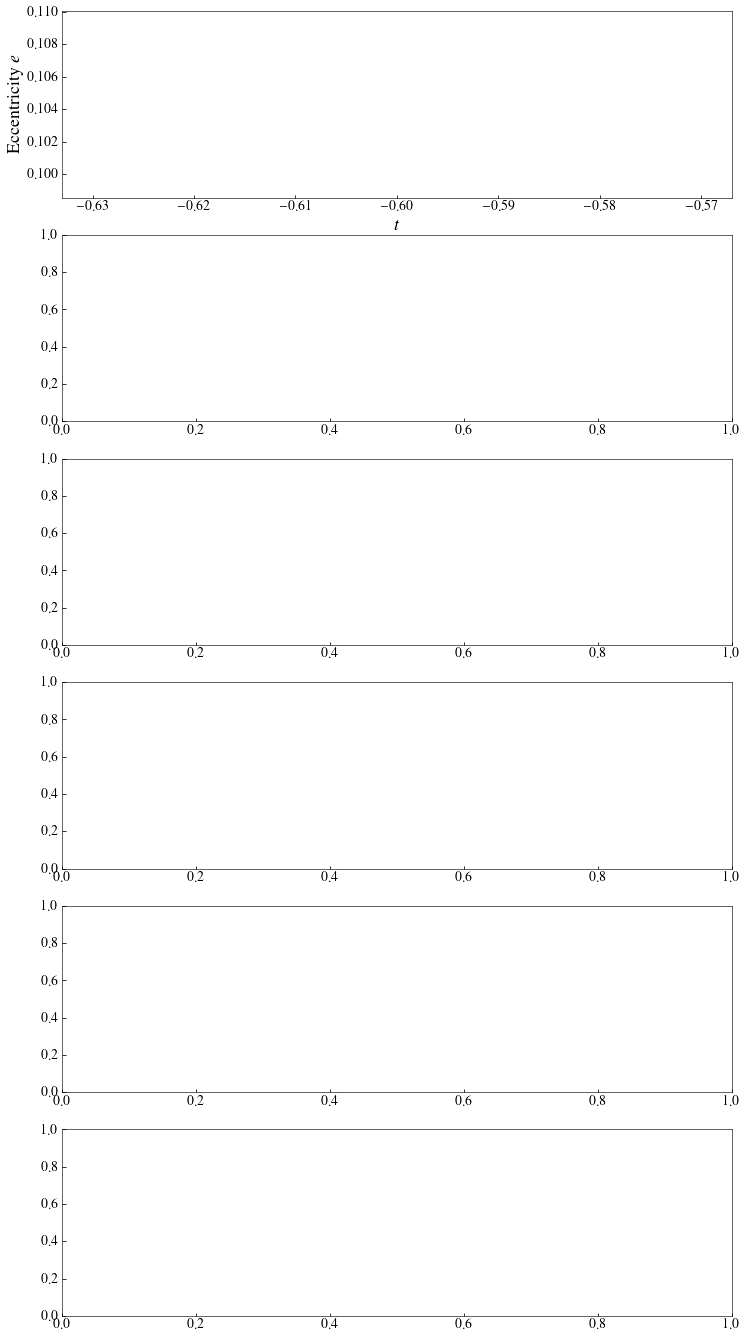

In [98]:
fig, ax = eccMethod.make_diagnostic_plots()

In [93]:
int(np.log10(25))

1

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:729: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:675: UserWarning: At least a pair of apocenters are too close. Minimum orbital phase diff is 3.1144855048860904. Times of occurrences are [-439.93787233]
  warnings.warn(f"At least a pair of {extrema_type} are too close."
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:681: UserWarning: Phase shift closer to pi than 2 pi detected.
  warnings.warn("Phase shift closer to pi than 2 pi detected.")
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:693: UserWarning: At least a pair of apocenters are too far. Maximum orbital phase diff is 10.483024

(5e-07, 2e-05)

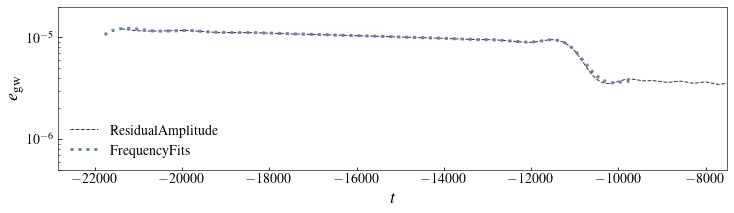

In [5]:
# Load data
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000104745_Momega00.010_meanAno1.571.h5",
                     "filepath_zero_ecc": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002_meanAno1.571.h5",
                     "include_zero_ecc": True}
dataDict = load_waveform(origin="EOB", **waveform_keywords)
tref_vec = dataDict["t"]

# settings for the plot
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figWidthsTwoColDict, lstyles, lwidths, colorsDict
style = "Notebook"
use_fancy_plotsettings(style=style)
fig, ax = plt.subplots(figsize=(figWidthsTwoColDict[style], 3))

for method in ["ResidualAmplitude", "FrequencyFits"]:
    tref_out, ecc_vec, mean_ano_vec, gwecc_obj = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
    gwecc_obj.plot_measured_ecc(fig, ax, **{"ls": lstyles[method], "lw": lwidths[method], "c": colorsDict[method], "label": method})
ax.set_yscale("log")
ax.legend()
ax.set_xlim(right=-7500)
ax.set_ylim(5e-7, 2e-5)

In [5]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q8_e01_D14.5_Res3.h5"}
dataDict = load_waveform(origin="LVCNR", **waveform_keywords)

waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0020996536_Momega00.010_meanAno1.571.h5"}
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTestSEOBpeakDectection_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0020000000_fmin13.3540333432_M50.0_meanAno1.571_20000.h5"}
dataDict = load_waveform(origin="EOB", **waveform_keywords)


tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": True}) # , 'refine_extrema': True})
print(ecc_vec)

t_analyse[0]=-20000.115342559344, t_analyse[-1]=-1.1153425593434327, global fit to t<=-14241.115342559344
global fit: guess p0=[0.02188649561984348, 8.206930850057942e-07, 0.0],  t_center=-10000.615342559344
            bounds=[[0.0, 0.0, -0.8922740474747463], [0.21886495619843482, 2.1885148933487848e-05, 10000.615342559344]]
            result p_global=[2.59792403e-02 8.22456536e-07 1.79779978e+03]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=1323, K_initial=1.100, p_initial=0.862(+1797.80-t)^-0.374, refine_extrema=False
it=1:  [0 / 1323 / 4000],  K=1.100
       find_peaks: distance=439, prominence=4.0324193033821135e-06
       idx_extrema=   [ 547 1276 1997 2710 3415], Nleft=2, Nright=3
       t[idx_extrema]=[-19453.12 -18724.12 -18003.12 -17290.12 -16585.12]
       Count_Nright_short=1
       idx_ref increased to 2353
       idx_hi increased to 4412
it=2:  [0 / 2353 / 4412],  K=1.222
       idx_extrema=   [ 547 1276 1997 271

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:773: UserWarning: There is at least one instance where pericenters and apocenters do not appear alternately.
  warnings.warn(
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:693: UserWarning: At least a pair of pericenters are too far. Maximum orbital phase diff is 21.09624709928636. Times of occurrences are [-478.11534256]
  warnings.warn(f"At least a pair of {extrema_type} are too far."
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:714: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


In [8]:
help(load_waveform)

Help on function load_waveform in module gw_eccentricity.load_data:

load_waveform(origin='LAL', **kwargs)
    Load waveform.
    
    parameters:
    ----------
    origin: str
        The origin of the waveform to be provided.  This can be one of
        - "LAL": Compute waveform by a call to the LAL-library.
        - "LVCNR": Import waveform by reading a file in the LVCNR-data format.
        - "EOB": Import EOB waveform generated using SEOBNRv4EHM
            (arxiv:2112.06952).
        - "EMRI": Import EMRI waveform generated by Maarten.
        In each case, the `kwargs` dictionary provides the needed information
        to uniquely specify the waveform.
    kwargs:
        Kwargs dictionary to be passed to the waveform loading functions.
        As mentioned above, the dictionary would depend on the `origin`
        of the waveform to be loaded/imported/generated.
        - "LAL": For generating waveform calling the LAL library. See
            load_data.load_LAL_waveform for t